In [15]:
import Wavefront_Generation as WG
import Wavefront_Plotting as WP
import Wavefront_Misc as WM
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact, widgets
%matplotlib widget

In [16]:
interface = WG.Full_Cycle(L_time=1,C_time =1,L_impedance = 100,show_about=False, number_periods=1.5)

we start first with the simple time plot of the interconnect

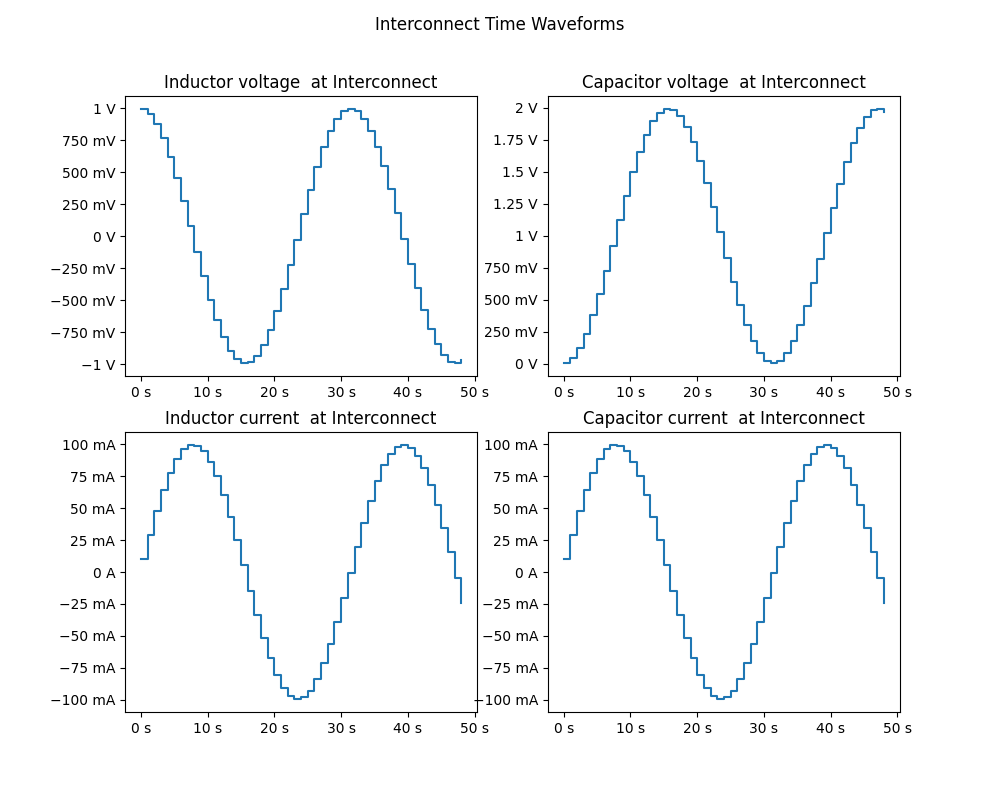

In [17]:
fig_interconnect_all,ax_interconnect_all = WP.make_time_interconnect_all(interface)

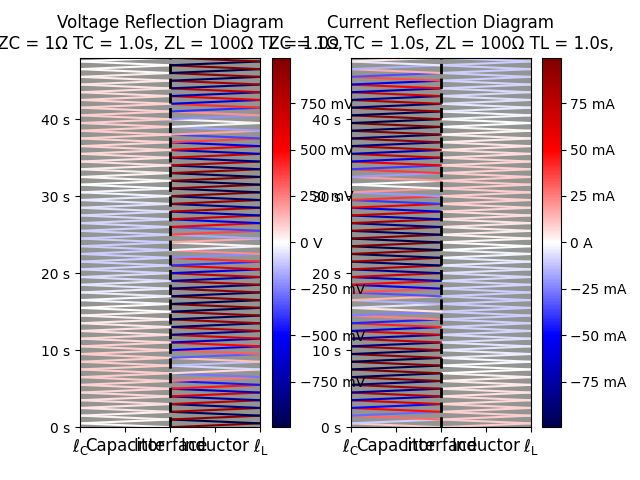

In [18]:
fig_ref, ax_ref = plt.subplots(1,2)

WP.plot_refelction_diagram(interface, ax_ref[0],True)
WP.plot_refelction_diagram(interface, ax_ref[1],False)

In [19]:
def make_interconnect_time_and_fanout_path(is_Voltage:bool =True,padding =0):

    fig_path, ax_path = plt.subplot_mosaic([['INTER','INTER'],
                                            ['LF','CF']])
    
    if(is_Voltage):
        which_str_prefix = 'voltage '
        ax_voltage = ax_path['INTER']
        ax_current =False
    else:
        which_str_prefix = 'current '
        ax_voltage =False
        ax_current = ax_path['INTER']
        

    WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['LF'],which_str_prefix+'inductor',padding=padding)
    WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['CF'],which_str_prefix+'capacitor',padding=padding)

    def plot_path(t):
        WP.clear_subplot(ax_path.values())
        
        WP.plot_time_interconnect_and_intercepts_at_time(t,interface,ax_voltage=ax_voltage,ax_current=ax_current)
        WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['LF'],which_str_prefix+'inductor',show_colour_bar=False,padding=padding)
        WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['CF'],which_str_prefix+'capacitor',show_colour_bar=False,padding=padding)
        WP.plot_trace_on_merged_fanout_axis(interface,ax_path['LF'],t,show_cross=True,padding=padding)
        WP.plot_trace_on_merged_fanout_axis(interface,ax_path['CF'],t,show_cross=True,padding=padding)
        
    inter = interact(plot_path,t=widgets.FloatSlider(min=0, max=float(interface.data_input.Simulation_Stop_Time), step=0.1, value=0, layout=widgets.Layout(width='auto')))

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=47.12388980385)…

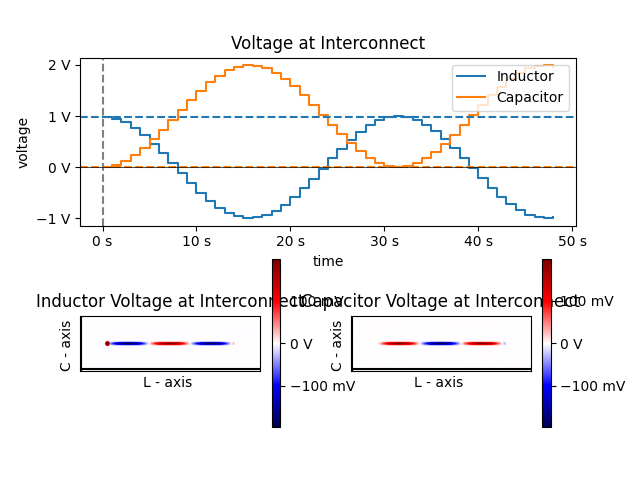

In [28]:
make_interconnect_time_and_fanout_path(True,10)

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=47.12388980385)…

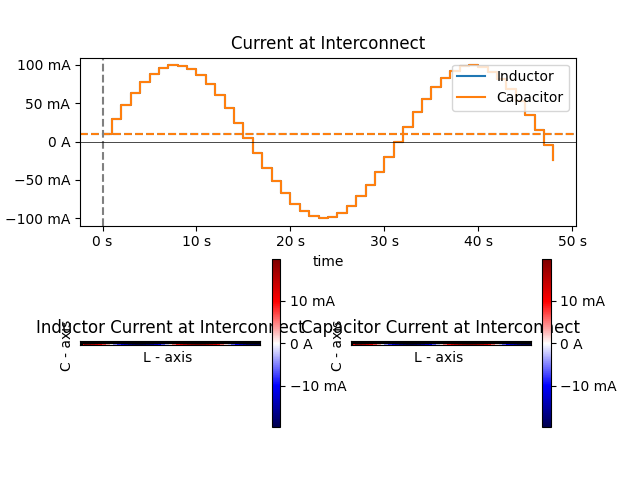

In [21]:
make_interconnect_time_and_fanout_path(False)

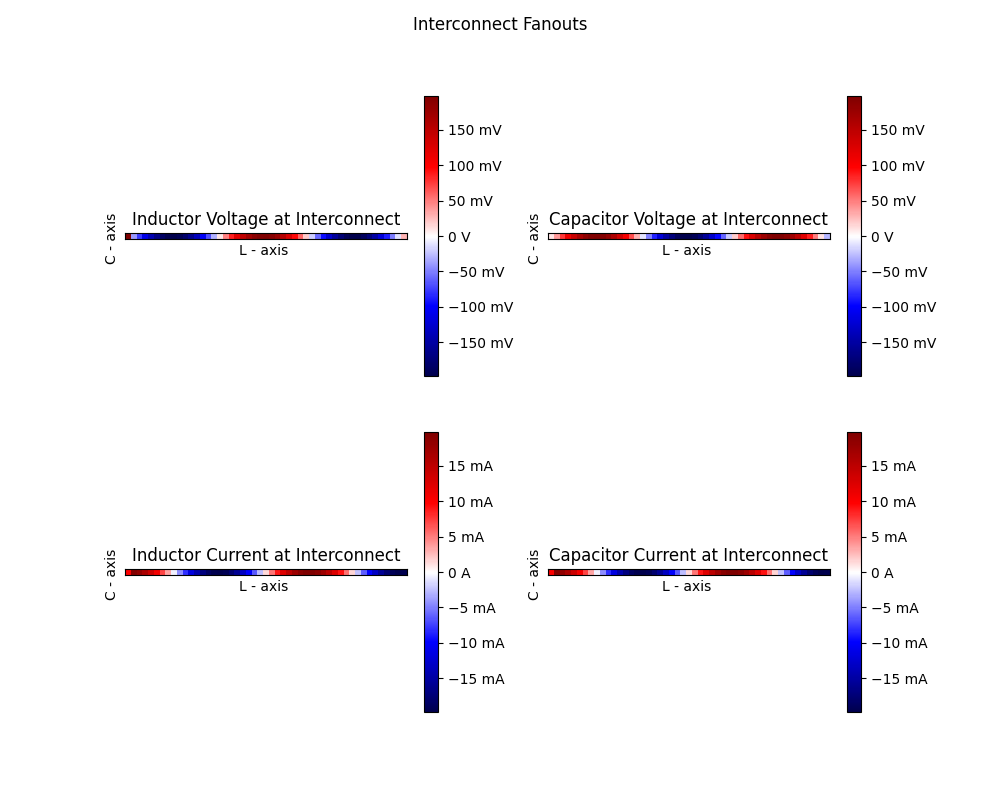

In [22]:
fig_int, ax_int = WP.make_fanout_interconnect_all(interface.data_output_multiplicative)
# WP.plot_trace_on_merged_fanout_axis(interface,ax_int['VC'])

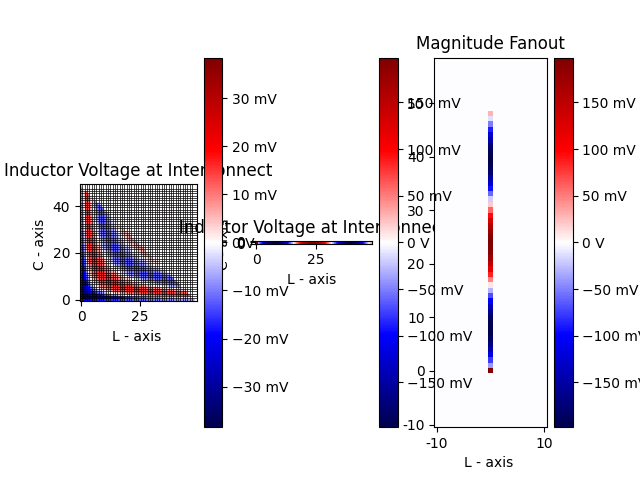

In [29]:
fug_mult, ax_mult = plt.subplots(1,3)

WP.plot_fanout_interconnect(interface.data_output_commutative,ax_mult[0],'voltage inductor',show_ticks = True)
WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_mult[1],'voltage inductor',show_ticks = True)

data_C_axis = WG.transform_merged_array_to_C_axis(interface.data_input, interface.data_output_multiplicative.get_interconnect_array('voltage inductor'))
WP.plot_fanout_magnitude(data_C_axis,ax_mult[2],show_ticks = True, units = 'V',padding=10,contrast = True)

KL = interface.data_input.Inductor_LCM_Factor
KC = interface.data_input.Capacitor_LCM_Factor
number_lines = interface.data_input.Number_of_Layers

number_KL = math.ceil(number_lines/KL)

for i in range(number_KL):
    line_x_pos = i*KL - 0.5
    ax_mult[0].axvline(x=line_x_pos, linewidth=0.5,c='k')
    
number_KC = math.ceil(number_lines/KC)

for i in range(number_KC):
    line_y_pos = i*KC - 0.5
    ax_mult[0].axhline(y=line_y_pos, linewidth=0.5,c='k')


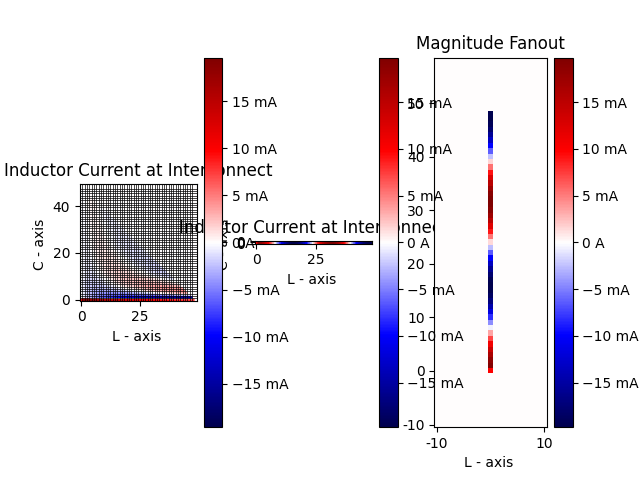

In [24]:
fug_mult, ax_mult = plt.subplots(1,3)

WP.plot_fanout_interconnect(interface.data_output_commutative,ax_mult[0],'current inductor',show_ticks = True)
WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_mult[1],'current inductor',show_ticks = True)

data_C_axis = WG.transform_merged_array_to_C_axis(interface.data_input, interface.data_output_multiplicative.get_interconnect_array('current inductor'))
WP.plot_fanout_magnitude(data_C_axis,ax_mult[2],show_ticks = True, units = 'A',padding=10)

KL = interface.data_input.Inductor_LCM_Factor
KC = interface.data_input.Capacitor_LCM_Factor
number_lines = interface.data_input.Number_of_Layers

number_KL = math.ceil(number_lines/KL)

for i in range(number_KL):
    line_x_pos = i*KL - 0.5
    ax_mult[0].axvline(x=line_x_pos, linewidth=0.5,c='k')
    
number_KC = math.ceil(number_lines/KC)

for i in range(number_KC):
    line_y_pos = i*KC - 0.5
    ax_mult[0].axhline(y=line_y_pos, linewidth=0.5,c='k')


interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=47.12388980385)…

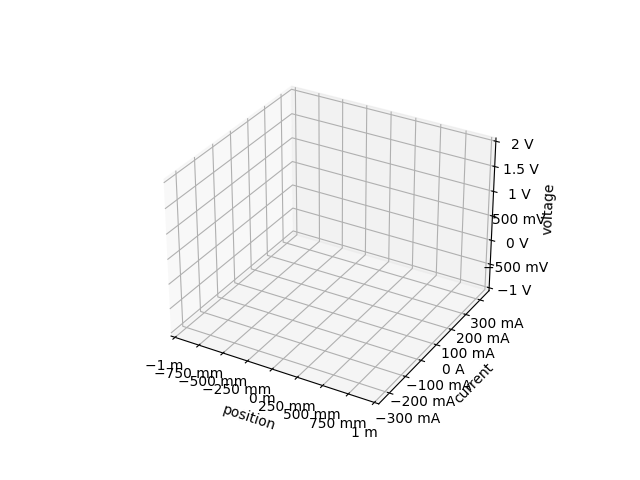

In [30]:
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111,projection='3d')

ax_3d.set_xlim(-1,1)
ax_3d.set_ylim(-0.35,0.35)

def interact_3D_func(t):
    ax_3d.clear()
    ax_3d.set_xlim(-1,1)
    ax_3d.set_ylim(-0.35,0.35)
    ax_3d.set_zlim(-1,2)
    WP.make_3d_spatial(str(t),interface,ax_3d)
    
inter_2 = interact(interact_3D_func,t=widgets.FloatSlider(min=0, max=float(interface.data_input.Simulation_Stop_Time), step=0.1, value=0, layout=widgets.Layout(width='auto')))

In [26]:
interface_2 = WG.Full_Cycle(L_impedance=1, C_impedance = 100, Simulation_stop_time = interface.data_input.Simulation_Stop_Time , show_about = False)

(<Figure size 1000x800 with 4 Axes>,
 {'IL': <AxesSubplot:label='IL', title={'center':'Inductor current  at Interconnect'}>,
  'IC': <AxesSubplot:label='IC', title={'center':'Capacitor current  at Interconnect'}>,
  'VC': <AxesSubplot:label='VC', title={'center':'Capacitor voltage  at Interconnect'}>,
  'VL': <AxesSubplot:label='VL', title={'center':'Inductor voltage  at Interconnect'}>})

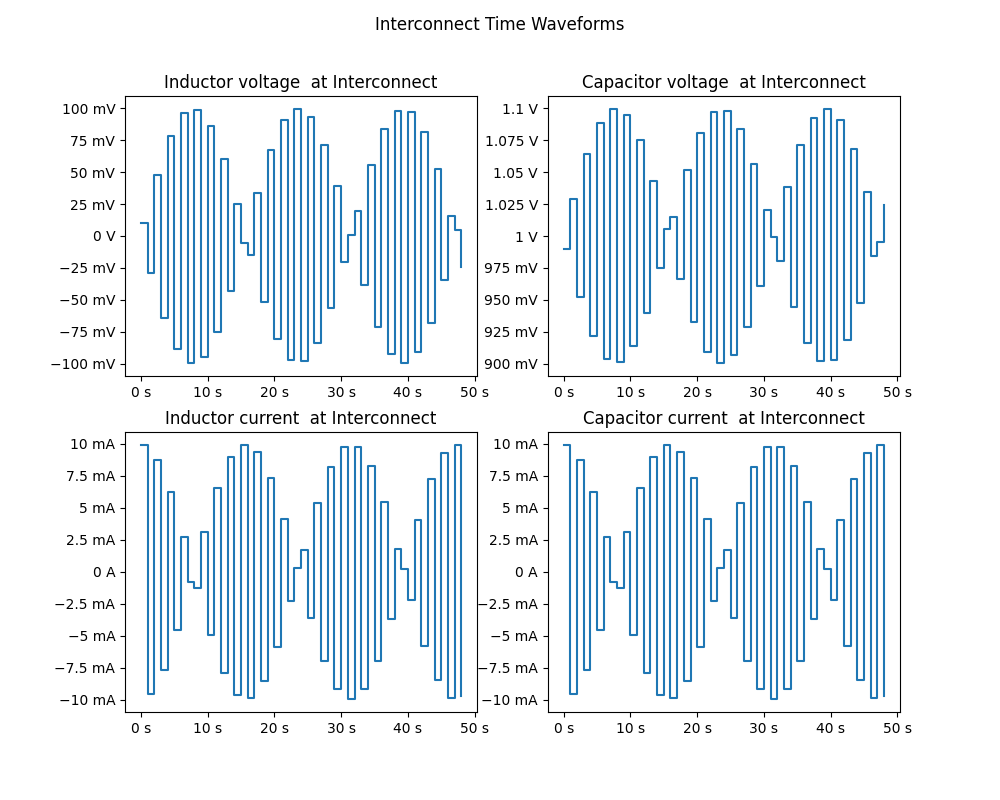

In [27]:
WP.make_time_interconnect_all(interface_2)